# Part f)

In [1]:
import os
os.sys.path.append(os.path.dirname(os.path.abspath('.')))
import numpy as np
from imageio import imread
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from sklearn.preprocessing import StandardScaler
from src.features.polynomial import PolynomialFeatures
from src.models.models import OLS
from src.evaluation.evaluation import mse, r_squared

In [3]:
terrain1 = imread('../data/raw/SRTM_data_Norway_1.tif')
# Warnings here. Might there be another way?

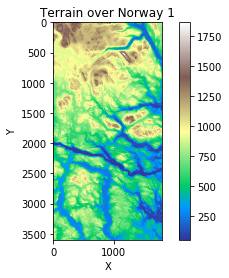

In [4]:
plt.figure()
plt.title('Terrain over Norway 1')
plt.imshow(terrain1, cmap='terrain')
plt.xlabel('X')
plt.ylabel('Y')
plt.colorbar()
plt.show()

In [5]:
# scale array
ss = StandardScaler()
terrain2 = ss.fit_transform(terrain1.astype(float))

In [6]:
# Preparations for constructing the feature matrix
x = np.arange(terrain2.shape[1])
y = np.arange(terrain2.shape[0])
x, y = np.meshgrid(x, y)
x, y = x.ravel(), y.ravel()
z = terrain2.ravel()

In [8]:
# Constructing the feature matrix
pf = PolynomialFeatures(2)
X = pf.fit_transform(np.c_[x.reshape((-1, 1)), y.reshape((-1, 1))], ['x', 'y'])

In [13]:
# Fitting the model
ols = OLS()
ols.fit(X, z)

In [14]:
# Obtaining the predictions
predictions = ols.predict(X)
mean_squared_error = mse(z, predictions)
rs = r_squared(z, predictions)
print(mean_squared_error, rs)

0.5710250536109409 0.9999999119522365
